In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

/Users/jwilliamson/venvs/Apple-mapping/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
cf = gpd.read_file("https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson")
cf = cf[cf["STATE"]=="23"].reset_index()
cf = cf.drop(columns=["STATE", "index", "id", "GEO_ID", "CENSUSAREA", "COUNTY", "LSAD"])
cf = cf.rename(columns={"NAME":"county"})
cf

,county,geometry
0,Hancock,"MULTIPOLYGON (((-68.49946 44.12419, -68.49289 ..."
1,Washington,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ..."
2,Franklin,"POLYGON ((-69.93045 44.61085, -69.94408 44.537..."
3,Lincoln,"MULTIPOLYGON (((-69.30791 43.77377, -69.30675 ..."
4,Piscataquis,"POLYGON ((-69.23202 45.09017, -69.35567 45.073..."
5,Sagadahoc,"POLYGON ((-70.05182 43.99098, -70.00547 44.124..."
6,York,"POLYGON ((-70.5367 43.3356, -70.55385 43.32189..."
7,Kennebec,"POLYGON ((-69.79281 44.57733, -69.77629 44.608..."
8,Oxford,"POLYGON ((-70.59563 44.03206, -70.58733 44.122..."
9,Androscoggin,"POLYGON ((-70.08084 43.92646, -70.22924 43.974..."


In [3]:
dt = pd.read_csv("../reformated_data.csv", index_col=False)
dt


FileNotFoundError: [Errno 2] No such file or directory: '../reformated_data.csv'

<Axes: xlabel='year', ylabel='apple_totals'>

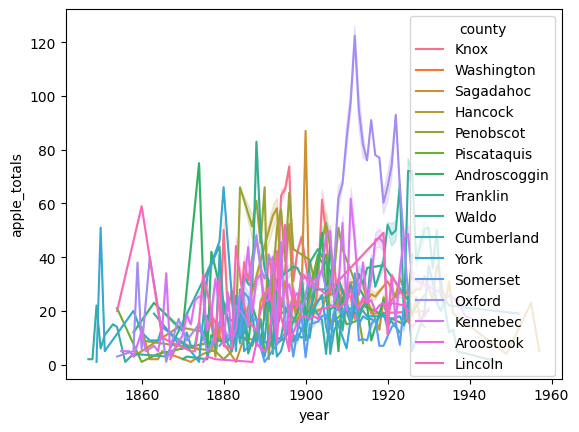

In [37]:
sns.lineplot(dt, x="year", y="apple_totals", hue="county")

<Axes: xlabel='year', ylabel='apple_totals'>

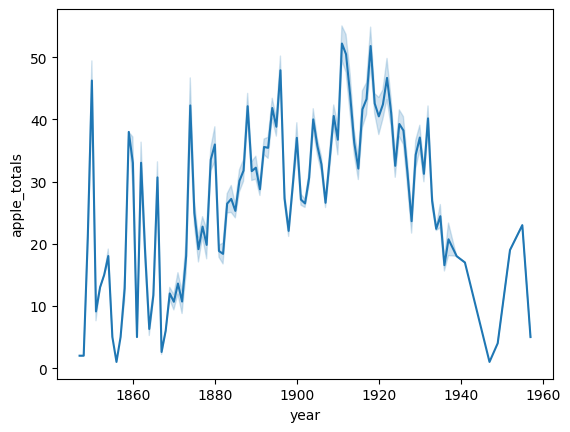

In [34]:
sns.lineplot(dt, x="year", y="apple_totals")

In [62]:
dt.nlargest(128,'apple_totals')

,county,fair,year,apple_type,apple_totals
17897,Oxford,Oxford Co. Fair,1912,(Pear) Adelaide,127
17898,Oxford,Oxford Co. Fair,1912,(Pear) Bartlett,127
17899,Oxford,Oxford Co. Fair,1912,(Pear) Belle Lucrative,127
17900,Oxford,Oxford Co. Fair,1912,(Pear) Beurre Bosc,127
17901,Oxford,Oxford Co. Fair,1912,(Pear) Beurre Clairgeau,127
...,...,...,...,...,...
18020,Oxford,Oxford Co. Fair,1912,Wealthy,127
18021,Oxford,Oxford Co. Fair,1912,William's Favorite,127
18022,Oxford,Oxford Co. Fair,1912,Wine,127
18023,Oxford,Oxford Co. Fair,1912,Winesap,127


In [3]:
ax = gplt.pointplot(nf,zorder=-1 ,projection=gcrs.AlbersEqualArea())
fig = plt.figure()
ax = fig.add_subplot(111)
gplt.polyplot(ax, cf, ax=ax)



NameError: name 'nf' is not defined